## Quickstart
## 快速开始

- Eager to get started? This page gives a good introduction to Flask. It assumes you already have Flask installed. If you do not, head over to the Installation section.
- 渴望马上开始？这篇文章将向你介绍Flask，此时假定你已正确安装了Flask。如果你还没安装，请转向“安装”环节。


### A Minimal Application
### 最小可用程序

- A minimal Flask application looks something like this:
- 下面的例子就是一个最小可用程序：

```python
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'
```

- So what did that code do?
- 这段代码做了什么呢？

1. First we imported the Flask class. An instance of this class will be our WSGI application.
1. 首先，（第一行）我们引入了了Flask类，这个例子将是一个WSGI应用。

2. Next we create an instance of this class.The first argument is the name of the application’s module or package. If you are using a single module (as in this example), you should use __name__ because depending on if it’s started as application or imported as module the name will be different ('__main__' versus the actual import name). This is needed so that Flask knows where to look for templates, static files, and so on. For more information have a look at the Flask documentation.
2. 接下来，我们创建了一个例子。(第二行）遇到了第一个参数，即应用模块（或包）的名字。如果你的程序只有一个模块（就像这个例子），你应该用__name__这个名字，因为这个程序是做为主程序运行(__name__='__main__')，还是当做模块被调用（__name__=文件名），__name__的值是不同的。这样不同的__name__值将告诉Flask应该到哪里去找模板、静态文件等。更多信息，请查看Flask文档。

---
**我的理解**：
因为Python程序，经常使用if __name__ == '__main__':
所有的模块都有一个内置属性 __name__。一个模块的 __name__ 的值取决于您如何应用模块。
1. 如果 import 一个模块，那么模块__name__ 的值通常为模块文件名，不带路径或者文件扩展名。
2. 如果像一个标准的程序样直接运行模块，在这 种情况下, __name__ 的值将是一个特别缺省'__main__'
例如，在cmd 中直接运行test.py文件,则__name__的值是'__main__';
而在import 一个test.py文件后,__name__的值就不是'__main__'了，而是test
从而用if __name__ == '__main__'来判断是否是在直接运行该.py文件。看个例子，如下：

```python
#Test.py
class Test:
    def __init(self):pass
    def f(self):print 'Hello, World!'
if __name__ == '__main__':
    Test().f()
#End
```

- 你在cmd中输入:C:>python Test.py，屏幕显示：Hello, World!，说明:"__name__ == '__main__'"是成立的；
- 你再在cmd中输入:C:>python，

```python
>>>import Test
>>>Test.__name__          #Test模块的__name__
'Test'
>>>__name__               #当前程序的__name__
'__main__'
```

无论怎样,Test.py中的"__name__ == '__main__'"都不会成立的!所以,下一行代码永远不会运行到!

---

3. We then use the route() decorator to tell Flask what URL should trigger our function.
3. 然后我们使用了route()的装饰器，它告诉Flask括号内的网址将触发下面的函数。
    
4. The function is given a name which is also used to generate URLs for that particular function, and returns the message we want to display in the user’s browser.
4. 在def hello_world():这一行，定义了函数的名称为hello_world，函数的名字也在生成 URL 时被用到，这个函数返回我们想要显示在用户浏览器中的信息。

- Just save it as hello.py or something similar. Make sure to not call your application flask.py because this would conflict with Flask itself.
- 把它保存为 hello.py （或是类似的），然后用 Python 解释器来运行。 确保你的应用文件名不是 flask.py ，因为这将与 Flask 本身冲突。

- To run the application you can either use the flask command or python’s -m switch with Flask. Before you can do that you need to tell your terminal the application to work with by exporting the FLASK_APP environment variable:
- 想运行这个程序，你可以使用Flask命令，也可以使用Python的-m Flask命令。在此之前，你需要使用export命令来告诉你的终端你要运行哪个程序文件，如下：

```
$ export FLASK_APP=hello.py
$ flask run
* Running on http://127.0.0.1:5000/
```

- If you are on Windows you need to use set instead of export.Alternatively you can use python -m flask:
- 如果你是Windows用户，你需要使用python -m flask方法，如下：

```
$ export FLASK_APP=hello.py
$ python -m flask run
* Running on http://127.0.0.1:5000/
```

- This launches a very simple builtin server, which is good enough for testing but probably not what you want to use in production. For deployment options see Deployment Options.
- （这一段的翻译需要再考虑，不是很理解）这个简单的程序将运行在本地服务器上，它足够简单，但是也许你想讲程序部署到其他地方，请看部署选项。

- Now head over to http://127.0.0.1:5000/, and you should see your hello world greeting.
- 现在可以在浏览器里输入：http://127.0.0.1:5000/ ，你就能看到Hello World 的问候了。

### Externally Visible Server
### 可访问的外部服务器

- If you run the server you will notice that the server is only accessible from your own computer, not from any other in the network. This is the default because in debugging mode a user of the application can execute arbitrary Python code on your computer.
- 如果你尝试了上面的操作，你会发现http://127.0.0.1:5000/ 只能从你自己的电脑上操作，网络里的其他电脑都不行。这是默认的方式，因为在调试模式（边修改代码，边查看显示结果的模式）下，任何人只要在你的电脑上都可以执行这些Python代码。

- If you have the debugger disabled or trust the users on your network, you can make the server publicly available simply by adding --host=0.0.0.0 to the command line:
- 如果你禁用了调试模式、或者你信任网络上的人，你可以简单修改 run()的参数，使你的服务器公开可用，如下:

```python
flask run --host=0.0.0.0
```

- This tells your operating system to listen on all public IPs.
- 这会让操作系统监听所有公网 IP

### What to do if the Server does not Start
### 如果服务器没有启怎么办

- In case the python -m flask fails or flask does not exist, there are multiple reasons this might be the case. First of all you need to look at the error message.
- 如果-m flask失败，或者flask不存在，会有很多原因。你首先需要做的是查看报错信息。

### Old Version of Flask
### 旧版本Flask

- Versions of Flask older than 0.11 use to have different ways to start the application. In short, the flask command did not exist, and neither did python -m flask. In that case you have two options: either upgrade to newer Flask versions or have a look at the Development Server docs to see the alternative method for running a server.
- 0.11版本以前的旧版Flask使用了不同的方式启动应用。简而言之，flask命令或-m flask不存在。如果是这样，你可以有2个选择：更新的新版本的Flask，或者查看“Development”文档寻找启动服务器的方法。

### Invalid Import Name
### 无效的引用名

- The FLASK_APP environment variable is the name of the module to import at flask run. In case that module is incorrectly named you will get an import error upon start (or if debug is enabled when you navigate to the application). It will tell you what it tried to import and why it failed.

- The most common reason is a typo or because you did not actually create an app object.

### Debug Mode
### 调试模式

(Want to just log errors and stack traces? See Application Errors)
（想知道登录错误、堆栈跟踪？请看“Application Errors”）

- The flask script is nice to start a local development server, but you would have to restart it manually after each change to your code. That is not very nice and Flask can do better. If you enable debug support the server will reload itself on code changes, and it will also provide you with a helpful debugger if things go wrong.
- Flask启动了一个本地开发服务器，但是每次你改动你的代码后，都需要手动重启服务器。这样很不方便，但是Flask提供的解决方法：当你开启了调试模式，服务器可以在代码修改后自动重读，并在发生错误后，提供一个相当有用的调试器（提示错误信息）。

- To enable debug mode you can export the FLASK_DEBUG environment variable before running the server:
- 开启调试模式，可以在启动服务器前，输入FLASK_DEBUG环境变量：

```
$ export FLASK_DEBUG=1
$ flask run
```

(On Windows you need to use set instead of export).

- This does the following things:
- 实际上是实现了下面的事情：
    it activates the debugger
    激活了调试器
    it activates the automatic reloader
    激活了自动重读（加载）
    it enables the debug mode on the Flask application.
    在Flask应用开启了调试模式

- There are more parameters that are explained in the Development Server docs.
- 在“Development”文档，可以看到更多解释。

---
- 旧版本翻译里也有相关的说明：
- 有两种途径来启用调试模式。一种是直接在应用对象上设置:
```python
app.debug = True
app.run()
```

- 另一种是作为 run 方法的一个参数传入:
```
app.run(debug=True)
```
- 两种方法的效果完全相同。

---

### Attention
### 注意

Even though the interactive debugger does not work in forking environments (which makes it nearly impossible to use on production servers), it still allows the execution of arbitrary code. This makes it a major security risk and therefore it must never be used on production machines.
调试器在允许 fork 的环境中无法正常使用（也即在生产服务器上正常使用几乎是不可能的），但它依然允许执行任意代码。这使它成为一个巨大的安全隐患，因此它 绝对不能用于生产环境 。

Screenshot of the debugger in action:
调试器的截屏：
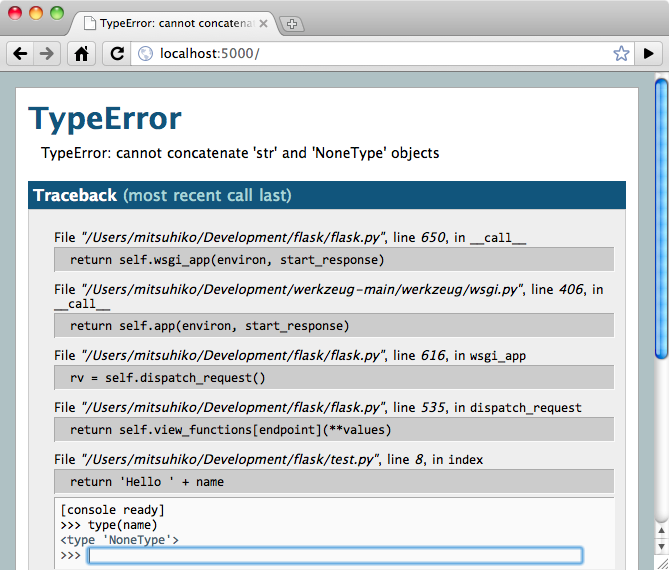

Have another debugger in mind? See Working with Debuggers.
想要另外的调试器，请看“Working with Debuggers”页面。

### Routing
### 路由

- Modern web applications have beautiful URLs. This helps people remember the URLs, which is especially handy for applications that are used from mobile devices with slower network connections. If the user can directly go to the desired page without having to hit the index page it is more likely they will like the page and come back next time.
- 现代Web应用的URL十分优雅，人们很容易记住，这一点对于那些使用低速网络移动设备的用户来说特别有用。如果可以不访问索引页，而是直接访问想要的那个页面，他们会非常喜欢这个页面并可能多次访问。。

- As you have seen above, the route() decorator is used to bind a function to a URL. Here are some basic examples:
- 正如你上面看到的，route()装饰器将一个函数绑定到一个URL上。下面就是一个基础的例子：

```
@app.route('/')
def index():
    return 'Index Page'

@app.route('/hello')
def hello():
    return 'Hello, World'
```

- But there is more to it! You can make certain parts of the URL dynamic and attach multiple rules to a function.
- 不仅如此！你还可以构造含有动态部分的 URL，也可以在一个函数上附着多个规则。

### Variable Rules

- To add variable parts to a URL you can mark these special sections as ```<variable_name>```.Such a part is then passed as a keyword argument to your function. Optionally a converter can be used by specifying a rule with ```<converter:variable_name>```. Here are some nice examples:
- 为了给你的URL添加变量部分，你可以把这些可变部分标记为```<variable_name>```。这<>里的部分将会作为命名参数传递到你的函数。而且还可以用转换器，格式是 ```<converter:variable_name>```。这里有一些不错的例子:

```python
@app.route('/user/<username>')
def show_user_profile(username):
    # show the user profile for that user
    return 'User %s' % username
```

```python
@app.route('/post/<int:post_id>')
def show_post(post_id):
    # show the post with the given id, the id is an integer
    return 'Post %d' % post_id
```

- The following converters exist:
- 有如下几种转换器：

| 转换器 | 作用 |
| --------   | -----:   |
|string|accepts any text without a slash (the default)|
|string|接受不含斜线的文本|
|int|accepts integers|
|int|接受整数|
|float|like int but for floating point values|
|float|与int类似，但是接受浮点数|
|path|like the default but also accepts slashes|
|path|文本包含斜线|
|any|matches one of the items provided|
|any|与提供的一个项目匹配|
|uuid|accepts UUID strings|
|uuid|接受UUID字符串|


### Unique URLs / Redirection Behavior
### 唯一 URL / 重定向行为

- Flask’s URL rules are based on Werkzeug’s routing module. The idea behind that module is to ensure beautiful and unique URLs based on precedents laid down by Apache and earlier HTTP servers.
- Flask 的 URL 规则基于 Werkzeug 的路由模块。这个模块背后的思想是基于 Apache 以及更早的 HTTP 服务器主张的先例，保证优雅且唯一的 URL。

- Take these two rules:
- 请看以下2个例子：

```
@app.route('/projects/')
def projects():
    return 'The project page'
```

```
@app.route('/about')
def about():
    return 'The about page'
```

- Though they look rather similar, they differ in their use of the trailing slash in the URL definition. In the first case, the canonical URL for the projects endpoint has a trailing slash. In that sense, it is similar to a folder on a filesystem. Accessing it without a trailing slash will cause Flask to redirect to the canonical URL with the trailing slash.
- 这2段代码看起来很像，区别是URL结尾是否是斜线。第一种情况中，指向 projects 的规范 URL 尾端有一个斜线。这种感觉很像在文件系统中的文件夹。输入URL时，如果忘记输入/，仍会被 Flask 重定向到带斜线的 URL 去。

- In the second case, however, the URL is defined without a trailing slash, rather like the pathname of a file on UNIX-like systems. Accessing the URL with a trailing slash will produce a 404 “Not Found” error.
- 在第二个代码中，结尾没有斜线，有点像UNIX系统里的文件名规则。输入URL时，如果结尾带/的话，会产生一个 404 “Not Found” 错误。

- This behavior allows relative URLs to continue working even if the trailing slash is omitted, consistent with how Apache and other servers work. Also, the URLs will stay unique, which helps search engines avoid indexing the same page twice.
- 这个行为使得在遗忘尾斜线时，允许关联的 URL 接任工作，与 Apache 和其它的服务器的行为并无二异。此外，也保证了 URL 的唯一，有助于避免搜索引擎索引同一个页面两次。

### URL Building
### 构造 URL

- If it can match URLs, can Flask also generate them? Of course it can.To build a URL to a specific function you can use the url_for() function.It accepts the name of the function as first argument and a number of keyword arguments, each corresponding to the variable part of the URL rule. Unknown variable parts are appended to the URL as query parameters. Here are some examples:
- Flask可以匹配URL的话，那么它可以生成URL吗？答案是：可以。你可以用 url_for() 来给指定的函数构造 URL。它接受函数名作为第一个参数，也接受一些参数给URL命名。未知变量部分会添加到 URL 末尾作为查询参数。这里有一些例子:

```python
from flask import Flask, url_for
app = Flask(__name__)

@app.route('/')
def index(): pass

@app.route('/login')
def login(): pass

@app.route('/user/<username>')
def profile(username): pass

with app.test_request_context():
print url_for('index')
print url_for('login')
print url_for('login', next='/')
print url_for('profile', username='John Doe')
```
显示应为：
/
/login
/login?next=/
/user/John%20Doe

(This also uses the test_request_context() method, explained below. It tells Flask to behave as though it is handling a request, even though we are interacting with it through a Python shell. Have a look at the explanation below. Context Locals).

- Why would you want to build URLs using the URL reversing function url_for() instead of hard-coding them into your templates? There are three good reasons for this:
- 为什么你要动态构建 URL 而非在模板中人工输入？这里有三个绝妙的理由：

1. Reversing is often more descriptive than hard-coding the URLs. More importantly, it allows you to change URLs in one go, without having to remember to change URLs all over the place.
1. 反向构建通常比硬编码的描述性更好。更重要的是，它允许你一次性修改 URL， 而不是到处边找边改。
2. URL building will handle escaping of special characters and Unicode data transparently for you, so you don’t have to deal with them.
2. URL 构建会转义特殊字符和 Unicode 数据，免去你很多麻烦。
3. If your application is placed outside the URL root - say, in /myapplication instead of / - url_for() will handle that properly for you.
3. 如果你的应用不位于 URL 的根路径（比如，在 /myapplication 下，而不是 / ）， url_for() 会妥善处理这个问题。


### HTTP Methods
### HTTP方法

HTTP (the protocol web applications are speaking) knows different methods for accessing URLs. By default, a route only answers to GET requests, but that can be changed by providing the methods argument to the route() decorator. Here are some examples:
HTTP有许多不同的方式访问URL。默认情况下，路由只回应 GET 请求，但是通过 route() 装饰器传递 methods 参数可以改变这个行为。这里有一些例子:

```python
from flask import request

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        do_the_login()
    else:
        show_the_login_form()
```

- If GET is present, HEAD will be added automatically for you. You don’t have to deal with that. It will also make sure that HEAD requests are handled as the HTTP RFC (the document describing the HTTP protocol) demands, so you can completely ignore that part of the HTTP specification. Likewise, as of Flask 0.6, OPTIONS is implemented for you automatically as well.
- （这一段不理解，附上网上的翻译）如果存在 GET ，那么也会替你自动地添加 HEAD，无需干预。它会确保遵照 HTTP RFC （描述 HTTP 协议的文档）处理 HEAD 请求，所以你可以完全忽略这部分的 HTTP 规范。同样，自从 Flask 0.6 起， 也实现了 OPTIONS 的自动处理。

- You have no idea what an HTTP method is? Worry not, here is a quick introduction to HTTP methods and why they matter:
- 对HTTP毫无头绪？不要担心，下面就简要介绍一下HTTP的方法：

- The HTTP method (also often called “the verb”) tells the server what the client wants to do with the requested page. The following methods are very common:
- HTTP 方法（也经常被叫做“谓词”）告知服务器，客户端想对请求的页面 做 些什么。下面的都是非常常见的方法：

**GET**
- The browser tells the server to just get the information stored on that page and send it. This is probably the most common method.
- 浏览器告诉服务器：只 获取 页面上的信息并回发给我。这是最常用的方法。

**HEAD**
- The browser tells the server to get the information, but it is only interested in the headers, not the content of the page. An application is supposed to handle that as if a GET request was received but to not deliver the actual content. In Flask you don’t have to deal with that at all, the underlying Werkzeug library handles that for you.
- 浏览器告诉服务器：欲获取信息，但是只关心消息头 。应用应像处理 GET 请求一样来处理它，但是不分发实际内容。在 Flask 中你完全无需 人工 干预，底层的 Werkzeug 库已经替你打点好了。

**POST**
- The browser tells the server that it wants to post some new information to that URL and that the server must ensure the data is stored and only stored once. This is how HTML forms usually transmit data to the server.
PUT
    Similar to POST but the server might trigger the store procedure multiple times by overwriting the old values more than once. Now you might be asking why this is useful, but there are some good reasons to do it this way. Consider that the connection is lost during transmission: in this situation a system between the browser and the server might receive the request safely a second time without breaking things. With POST that would not be possible because it must only be triggered once.
DELETE
    Remove the information at the given location.
OPTIONS
    Provides a quick way for a client to figure out which methods are supported by this URL. Starting with Flask 0.6, this is implemented for you automatically.

Now the interesting part is that in HTML4 and XHTML1, the only methods a form can submit to the server are GET and POST. But with JavaScript and future HTML standards you can use the other methods as well. Furthermore HTTP has become quite popular lately and browsers are no longer the only clients that are using HTTP. For instance, many revision control systems use it.
Static Files

Dynamic web applications also need static files. That’s usually where the CSS and JavaScript files are coming from. Ideally your web server is configured to serve them for you, but during development Flask can do that as well. Just create a folder called static in your package or next to your module and it will be available at /static on the application.

To generate URLs for static files, use the special 'static' endpoint name:

url_for('static', filename='style.css')

The file has to be stored on the filesystem as static/style.css.
Rendering Templates

Generating HTML from within Python is not fun, and actually pretty cumbersome because you have to do the HTML escaping on your own to keep the application secure. Because of that Flask configures the Jinja2 template engine for you automatically.

To render a template you can use the render_template() method. All you have to do is provide the name of the template and the variables you want to pass to the template engine as keyword arguments. Here’s a simple example of how to render a template:

from flask import render_template

@app.route('/hello/')
@app.route('/hello/<name>')
def hello(name=None):
    return render_template('hello.html', name=name)

Flask will look for templates in the templates folder. So if your application is a module, this folder is next to that module, if it’s a package it’s actually inside your package:

Case 1: a module:

/application.py
/templates
    /hello.html

Case 2: a package:

/application
    /__init__.py
    /templates
        /hello.html

For templates you can use the full power of Jinja2 templates. Head over to the official Jinja2 Template Documentation for more information.

Here is an example template:

<!doctype html>
<title>Hello from Flask</title>
{% if name %}
  <h1>Hello {{ name }}!</h1>
{% else %}
  <h1>Hello, World!</h1>
{% endif %}

Inside templates you also have access to the request, session and g [1] objects as well as the get_flashed_messages() function.

Templates are especially useful if inheritance is used. If you want to know how that works, head over to the Template Inheritance pattern documentation. Basically template inheritance makes it possible to keep certain elements on each page (like header, navigation and footer).

Automatic escaping is enabled, so if name contains HTML it will be escaped automatically. If you can trust a variable and you know that it will be safe HTML (for example because it came from a module that converts wiki markup to HTML) you can mark it as safe by using the Markup class or by using the |safe filter in the template. Head over to the Jinja 2 documentation for more examples.

Here is a basic introduction to how the Markup class works:

>>> from flask import Markup
>>> Markup('<strong>Hello %s!</strong>') % '<blink>hacker</blink>'
Markup(u'<strong>Hello &lt;blink&gt;hacker&lt;/blink&gt;!</strong>')
>>> Markup.escape('<blink>hacker</blink>')
Markup(u'&lt;blink&gt;hacker&lt;/blink&gt;')
>>> Markup('<em>Marked up</em> &raquo; HTML').striptags()
u'Marked up \xbb HTML'

Changed in version 0.5: Autoescaping is no longer enabled for all templates. The following extensions for templates trigger autoescaping: .html, .htm, .xml, .xhtml. Templates loaded from a string will have autoescaping disabled.
[1]	Unsure what that g object is? It’s something in which you can store information for your own needs, check the documentation of that object (g) and the Using SQLite 3 with Flask for more information.
Accessing Request Data

For web applications it’s crucial to react to the data a client sends to the server. In Flask this information is provided by the global request object. If you have some experience with Python you might be wondering how that object can be global and how Flask manages to still be threadsafe. The answer is context locals:
Context Locals

Insider Information

If you want to understand how that works and how you can implement tests with context locals, read this section, otherwise just skip it.

Certain objects in Flask are global objects, but not of the usual kind. These objects are actually proxies to objects that are local to a specific context. What a mouthful. But that is actually quite easy to understand.

Imagine the context being the handling thread. A request comes in and the web server decides to spawn a new thread (or something else, the underlying object is capable of dealing with concurrency systems other than threads). When Flask starts its internal request handling it figures out that the current thread is the active context and binds the current application and the WSGI environments to that context (thread). It does that in an intelligent way so that one application can invoke another application without breaking.

So what does this mean to you? Basically you can completely ignore that this is the case unless you are doing something like unit testing. You will notice that code which depends on a request object will suddenly break because there is no request object. The solution is creating a request object yourself and binding it to the context. The easiest solution for unit testing is to use the test_request_context() context manager. In combination with the with statement it will bind a test request so that you can interact with it. Here is an example:

from flask import request

with app.test_request_context('/hello', method='POST'):
    # now you can do something with the request until the
    # end of the with block, such as basic assertions:
    assert request.path == '/hello'
    assert request.method == 'POST'

The other possibility is passing a whole WSGI environment to the request_context() method:

from flask import request

with app.request_context(environ):
    assert request.method == 'POST'

The Request Object

The request object is documented in the API section and we will not cover it here in detail (see request). Here is a broad overview of some of the most common operations. First of all you have to import it from the flask module:

from flask import request

The current request method is available by using the method attribute. To access form data (data transmitted in a POST or PUT request) you can use the form attribute. Here is a full example of the two attributes mentioned above:

@app.route('/login', methods=['POST', 'GET'])
def login():
    error = None
    if request.method == 'POST':
        if valid_login(request.form['username'],
                       request.form['password']):
            return log_the_user_in(request.form['username'])
        else:
            error = 'Invalid username/password'
    # the code below is executed if the request method
    # was GET or the credentials were invalid
    return render_template('login.html', error=error)

What happens if the key does not exist in the form attribute? In that case a special KeyError is raised. You can catch it like a standard KeyError but if you don’t do that, a HTTP 400 Bad Request error page is shown instead. So for many situations you don’t have to deal with that problem.

To access parameters submitted in the URL (?key=value) you can use the args attribute:

searchword = request.args.get('key', '')

We recommend accessing URL parameters with get or by catching the KeyError because users might change the URL and presenting them a 400 bad request page in that case is not user friendly.

For a full list of methods and attributes of the request object, head over to the request documentation.
File Uploads

You can handle uploaded files with Flask easily. Just make sure not to forget to set the enctype="multipart/form-data" attribute on your HTML form, otherwise the browser will not transmit your files at all.

Uploaded files are stored in memory or at a temporary location on the filesystem. You can access those files by looking at the files attribute on the request object. Each uploaded file is stored in that dictionary. It behaves just like a standard Python file object, but it also has a save() method that allows you to store that file on the filesystem of the server. Here is a simple example showing how that works:

from flask import request

@app.route('/upload', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        f = request.files['the_file']
        f.save('/var/www/uploads/uploaded_file.txt')
    ...

If you want to know how the file was named on the client before it was uploaded to your application, you can access the filename attribute. However please keep in mind that this value can be forged so never ever trust that value. If you want to use the filename of the client to store the file on the server, pass it through the secure_filename() function that Werkzeug provides for you:

from flask import request
from werkzeug.utils import secure_filename

@app.route('/upload', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        f = request.files['the_file']
        f.save('/var/www/uploads/' + secure_filename(f.filename))
    ...

For some better examples, checkout the Uploading Files pattern.
Cookies

To access cookies you can use the cookies attribute. To set cookies you can use the set_cookie method of response objects. The cookies attribute of request objects is a dictionary with all the cookies the client transmits. If you want to use sessions, do not use the cookies directly but instead use the Sessions in Flask that add some security on top of cookies for you.

Reading cookies:

from flask import request

@app.route('/')
def index():
    username = request.cookies.get('username')
    # use cookies.get(key) instead of cookies[key] to not get a
    # KeyError if the cookie is missing.

Storing cookies:

from flask import make_response

@app.route('/')
def index():
    resp = make_response(render_template(...))
    resp.set_cookie('username', 'the username')
    return resp

Note that cookies are set on response objects. Since you normally just return strings from the view functions Flask will convert them into response objects for you. If you explicitly want to do that you can use the make_response() function and then modify it.

Sometimes you might want to set a cookie at a point where the response object does not exist yet. This is possible by utilizing the Deferred Request Callbacks pattern.

For this also see About Responses.
Redirects and Errors

To redirect a user to another endpoint, use the redirect() function; to abort a request early with an error code, use the abort() function:

from flask import abort, redirect, url_for

@app.route('/')
def index():
    return redirect(url_for('login'))

@app.route('/login')
def login():
    abort(401)
    this_is_never_executed()

This is a rather pointless example because a user will be redirected from the index to a page they cannot access (401 means access denied) but it shows how that works.

By default a black and white error page is shown for each error code. If you want to customize the error page, you can use the errorhandler() decorator:

from flask import render_template

@app.errorhandler(404)
def page_not_found(error):
    return render_template('page_not_found.html'), 404

Note the 404 after the render_template() call. This tells Flask that the status code of that page should be 404 which means not found. By default 200 is assumed which translates to: all went well.

See Error handlers for more details.
About Responses

The return value from a view function is automatically converted into a response object for you. If the return value is a string it’s converted into a response object with the string as response body, a 200 OK status code and a text/html mimetype. The logic that Flask applies to converting return values into response objects is as follows:

    If a response object of the correct type is returned it’s directly returned from the view.
    If it’s a string, a response object is created with that data and the default parameters.
    If a tuple is returned the items in the tuple can provide extra information. Such tuples have to be in the form (response, status, headers) or (response, headers) where at least one item has to be in the tuple. The status value will override the status code and headers can be a list or dictionary of additional header values.
    If none of that works, Flask will assume the return value is a valid WSGI application and convert that into a response object.

If you want to get hold of the resulting response object inside the view you can use the make_response() function.

Imagine you have a view like this:

@app.errorhandler(404)
def not_found(error):
    return render_template('error.html'), 404

You just need to wrap the return expression with make_response() and get the response object to modify it, then return it:

@app.errorhandler(404)
def not_found(error):
    resp = make_response(render_template('error.html'), 404)
    resp.headers['X-Something'] = 'A value'
    return resp

Sessions

In addition to the request object there is also a second object called session which allows you to store information specific to a user from one request to the next. This is implemented on top of cookies for you and signs the cookies cryptographically. What this means is that the user could look at the contents of your cookie but not modify it, unless they know the secret key used for signing.

In order to use sessions you have to set a secret key. Here is how sessions work:

from flask import Flask, session, redirect, url_for, escape, request

app = Flask(__name__)

@app.route('/')
def index():
    if 'username' in session:
        return 'Logged in as %s' % escape(session['username'])
    return 'You are not logged in'

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        session['username'] = request.form['username']
        return redirect(url_for('index'))
    return '''
        <form method="post">
            <p><input type=text name=username>
            <p><input type=submit value=Login>
        </form>
    '''

@app.route('/logout')
def logout():
    # remove the username from the session if it's there
    session.pop('username', None)
    return redirect(url_for('index'))

# set the secret key.  keep this really secret:
app.secret_key = 'A0Zr98j/3yX R~XHH!jmN]LWX/,?RT'

The escape() mentioned here does escaping for you if you are not using the template engine (as in this example).

How to generate good secret keys

The problem with random is that it’s hard to judge what is truly random. And a secret key should be as random as possible. Your operating system has ways to generate pretty random stuff based on a cryptographic random generator which can be used to get such a key:

>>> import os
>>> os.urandom(24)
'\xfd{H\xe5<\x95\xf9\xe3\x96.5\xd1\x01O<!\xd5\xa2\xa0\x9fR"\xa1\xa8'

Just take that thing and copy/paste it into your code and you're done.

A note on cookie-based sessions: Flask will take the values you put into the session object and serialize them into a cookie. If you are finding some values do not persist across requests, cookies are indeed enabled, and you are not getting a clear error message, check the size of the cookie in your page responses compared to the size supported by web browsers.

Besides the default client-side based sessions, if you want to handle sessions on the server-side instead, there are several Flask extensions that support this.
Message Flashing

Good applications and user interfaces are all about feedback. If the user does not get enough feedback they will probably end up hating the application. Flask provides a really simple way to give feedback to a user with the flashing system. The flashing system basically makes it possible to record a message at the end of a request and access it on the next (and only the next) request. This is usually combined with a layout template to expose the message.

To flash a message use the flash() method, to get hold of the messages you can use get_flashed_messages() which is also available in the templates. Check out the Message Flashing for a full example.
Logging

New in version 0.3.

Sometimes you might be in a situation where you deal with data that should be correct, but actually is not. For example you may have some client-side code that sends an HTTP request to the server but it’s obviously malformed. This might be caused by a user tampering with the data, or the client code failing. Most of the time it’s okay to reply with 400 Bad Request in that situation, but sometimes that won’t do and the code has to continue working.

You may still want to log that something fishy happened. This is where loggers come in handy. As of Flask 0.3 a logger is preconfigured for you to use.

Here are some example log calls:

app.logger.debug('A value for debugging')
app.logger.warning('A warning occurred (%d apples)', 42)
app.logger.error('An error occurred')

The attached logger is a standard logging Logger, so head over to the official logging documentation for more information.

Read more on Application Errors.
Hooking in WSGI Middlewares

If you want to add a WSGI middleware to your application you can wrap the internal WSGI application. For example if you want to use one of the middlewares from the Werkzeug package to work around bugs in lighttpd, you can do it like this:

from werkzeug.contrib.fixers import LighttpdCGIRootFix
app.wsgi_app = LighttpdCGIRootFix(app.wsgi_app)

Using Flask Extensions

Extensions are packages that help you accomplish common tasks. For example, Flask-SQLAlchemy provides SQLAlchemy support that makes it simple and easy to use with Flask.

For more on Flask extensions, have a look at Flask Extensions.
Deploying to a Web Server

Ready to deploy your new Flask app? Go to Deployment Options.
